# Emoji Prediction using Deep Learning

####     

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import tensorflow.keras

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
!cd  /content/drive/MyDrive/emoji_test
!ls

drive  sample_data


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/emoji_test/emoji_prediction/stp_zh.csv")
df.dropna(inplace=True)

In [ ]:
df.head(10)

,Tweet,Label
0,小復古最愛的人水牆,0
1,華麗昨天 kcon 化妝 羽毛,7
2,民主廣場喚醒令人震驚的結果決定 NBC 新聞,11
3,amp vilo 華特迪士尼魔法王國,0
4,銀河系很遠很遠,2
5,今晚佛羅裡達晚餐 煎鮭魚 蒸粗麥粉 蔬菜沙拉 美味的晚餐 佛羅裡達鮭魚,1
6,最喜歡的高級比賽恭喜擊敗西西塞勒姆,8
7,得到了正式的最好的朋友 phi mu jsu,0
8,原因想念小兄弟復古表弟愛印第安納大學,13
9,生日吻麥迪遜威斯康辛州,9


### Over-sampling data

In [ ]:
X = df["Tweet"].values
y = df["Label"].values

In [ ]:
from imblearn.over_sampling import RandomOverSampler

os = RandomOverSampler()
X = X.reshape(-1,1)
X, y = os.fit_resample(X, y)

In [ ]:
X = X.reshape(-1,)
X.shape

(12760,)

#   

### Tokenization

In [ ]:
import jieba
jieba.set_dictionary('/content/drive/MyDrive/emoji_test/emoji_prediction/dict.txt.big.txt')

def get_stopwords(file):
    stopword_list = []
    with open(file, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            stopword_list.append(line)
    return stopword_list

def remove_stopwords(sentence, stopwords):
    # 過濾掉停用詞
    return [word for word in sentence if word not in stopwords and word.strip()]

stopwords = get_stopwords('/content/drive/MyDrive/emoji_test/emoji_prediction/stopwords.txt')

In [ ]:
tokenized_sentences = []

for sentence in X:
    # 進行分詞
    words = list(jieba.cut(sentence))
    # 移除停用詞
    filtered_words = remove_stopwords(words, stopwords)
    tokenized_sentences.append(filtered_words)

print("Tokenized Sentences (first 10 sentences with stopwords removed):")
for i, sentence in enumerate(tokenized_sentences[:10]):
    print(sentence)

Building prefix dict from /content/drive/MyDrive/emoji_test/emoji_prediction/dict.txt.big.txt ...
DEBUG:jieba:Building prefix dict from /content/drive/MyDrive/emoji_test/emoji_prediction/dict.txt.big.txt ...
Loading model from cache /tmp/jieba.ue620194ddae41d58ba76a3a33a4155b0.cache
DEBUG:jieba:Loading model from cache /tmp/jieba.ue620194ddae41d58ba76a3a33a4155b0.cache
Loading model cost 1.227 seconds.
DEBUG:jieba:Loading model cost 1.227 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


Tokenized Sentences (first 10 sentences with stopwords removed):
['小', '復古', '最愛', '人水牆']
['華麗', '昨天', 'kcon', '化妝', '羽毛']
['民主', '廣場', '喚醒', '令人震驚', '決定', 'NBC', '新聞']
['amp', 'vilo', '華特', '迪士尼', '魔法', '王國']
['銀河系', '很遠', '很遠']
['今晚', '佛羅裡', '達', '晚餐', '煎', '鮭魚', '蒸', '粗', '麥粉', '蔬菜', '沙拉', '美味', '晚餐', '佛羅裡', '達', '鮭魚']
['喜歡', '高級', '比賽', '恭喜', '擊敗', '西', '西', '塞勒姆']
['得到', '正式', '最好', '朋友', 'phi', 'mu', 'jsu']
['原因', '想念', '小兄弟', '復古', '表弟', '愛', '印第安納', '大學']
['生日', '吻', '麥迪遜', '威斯康辛', '州']


In [ ]:
from keras.preprocessing.text import Tokenizer

# 將分詞結果轉換為文本形式，以便 Tokenizer 使用
tokenized_texts = [" ".join(sentence) for sentence in tokenized_sentences]

# 初始化 Tokenizer 並擬合文本數據
tokenizer = Tokenizer(num_words=80000)
tokenizer.fit_on_texts(tokenized_texts) #字按照頻率排序會計算文本數據中每個詞語的出現頻率，並基於這些頻率構建一個詞彙表。這個詞彙表可以用來將文本轉換為數字序列。

print("Text \n",tokenized_texts[:10],'\n')

# 將文本轉換為數字序列
X_seqs = tokenizer.texts_to_sequences(tokenized_texts)
# 印數字序列
print("Sequences:")
X_seqs[:10]


Text 
 ['小 復古 最愛 人水牆', '華麗 昨天 kcon 化妝 羽毛', '民主 廣場 喚醒 令人震驚 決定 NBC 新聞', 'amp vilo 華特 迪士尼 魔法 王國', '銀河系 很遠 很遠', '今晚 佛羅裡 達 晚餐 煎 鮭魚 蒸 粗 麥粉 蔬菜 沙拉 美味 晚餐 佛羅裡 達 鮭魚', '喜歡 高級 比賽 恭喜 擊敗 西 西 塞勒姆', '得到 正式 最好 朋友 phi mu jsu', '原因 想念 小兄弟 復古 表弟 愛 印第安納 大學', '生日 吻 麥迪遜 威斯康辛 州'] 

Sequences:


[[68, 229, 149, 6241],
 [237, 137, 4380, 1017, 1388],
 [1750, 161, 356, 1181, 1095, 1751, 211],
 [56, 6242, 693, 16, 107, 204],
 [4980, 3224, 3224],
 [32,
  21,
  250,
  84,
  5567,
  3791,
  5568,
  5569,
  5570,
  5571,
  4381,
  138,
  84,
  21,
  250,
  3791],
 [6, 625, 167, 357, 545, 92, 92, 1571],
 [64, 312, 23, 9, 4981, 6243, 5572],
 [396, 397, 1752, 229, 215, 4, 2784, 13],
 [65, 4982, 948, 4382, 36]]

In [ ]:
idx2words = tokenizer.index_word

print("Word Mappings\n")
for i in range(1,10):
    print("Index: ",i, "---->",idx2words[i])

Word Mappings

Index:  1 ----> 紐約
Index:  2 ----> 海灘
Index:  3 ----> 公園
Index:  4 ----> 愛
Index:  5 ----> 快樂
Index:  6 ----> 喜歡
Index:  7 ----> 感謝
Index:  8 ----> 今天
Index:  9 ----> 朋友


In [ ]:
vocab_size = len(tokenizer.index_word)
print("Vocabulary size :",len(tokenizer.index_word))

Vocabulary size : 7699


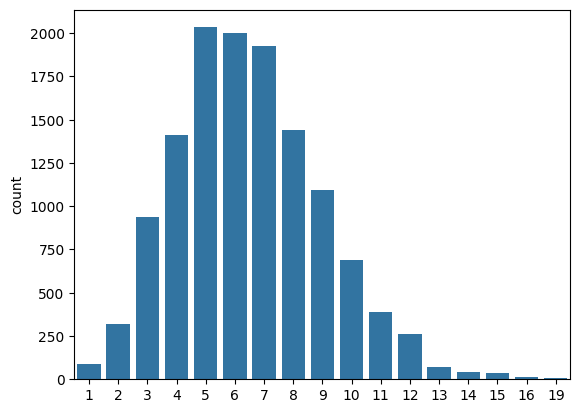

In [ ]:
lens = [len(seq) for seq in X_seqs]
sns.countplot(x=lens)
plt.show()

In [ ]:
from keras.preprocessing.sequence import pad_sequences

max_len=40
X_seqs_pd = pad_sequences(X_seqs, truncating="pre", padding="pre", maxlen=max_len)

In [ ]:
print("Before Padding")
print(X_seqs[:1])

print("\nAfter Padding")
print(X_seqs_pd[:1])

Before Padding
[[68, 229, 149, 6241]]

After Padding
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0   68  229  149 6241]]


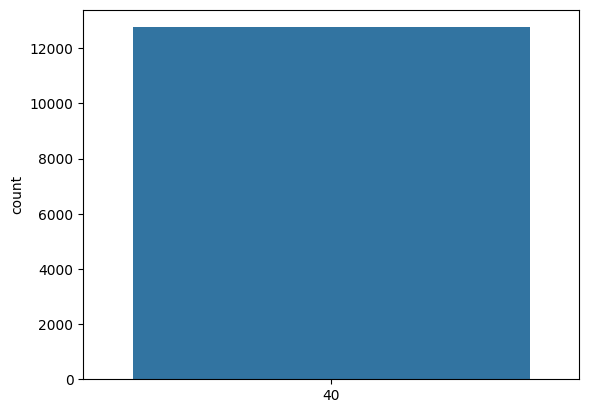

In [ ]:
lens = [len(seq) for seq in X_seqs_pd]
sns.countplot(x=lens)
plt.show()

### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test ,y_train, y_test = train_test_split(X_seqs_pd, y, test_size=0.2, random_state=105)
print("Training X Dim ",X_train.shape)
print("Training y Dim ",y_train.shape)

print("Test X Dim ",X_test.shape)
print("Test y Dim ",y_test.shape)

Training X Dim  (10208, 40)
Training y Dim  (10208,)
Test X Dim  (2552, 40)
Test y Dim  (2552,)


## LSTMs

In [ ]:
from keras.models import Sequential
from keras.layers import Dropout, Dense, LSTM, Bidirectional,Embedding, GlobalMaxPool1D



vocabulary_size = vocab_size
seq_len = 40
embed_len=20

model = Sequential()
model.add(Embedding(vocabulary_size+1, embed_len, input_length=seq_len))
model.add(LSTM(units = 80, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(units = 40))
model.add(Dropout(0.5))
model.add(Dense(units=20, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 20)            154000    
                                                                 
 lstm (LSTM)                 (None, 40, 80)            32320     
                                                                 
 dropout (Dropout)           (None, 40, 80)            0         
                                                                 
 lstm_1 (LSTM)               (None, 40)                19360     
                                                                 
 dropout_1 (Dropout)         (None, 40)                0         
                                                                 
 dense (Dense)               (None, 20)                820       
                                                                 
Total params: 206500 (806.64 KB)
Trainable params: 20650

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", mode="min", patience=1,verbose=1)

model.compile(loss = 'categorical_crossentropy',
             optimizer = "adam",
             metrics=["accuracy"])

In [ ]:
from keras.utils import to_categorical

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [ ]:
batch_size=128
epochs = 20

model.fit(X_train, y_train_cat, batch_size=batch_size, epochs = epochs, shuffle=True,
          validation_data=(X_test, y_test_cat), callbacks=[early_stop])

Epoch 1/20
80/80 [==============================] - 17s 144ms/step - loss: 2.9916 - accuracy: 0.0646 - val_loss: 2.9696 - val_accuracy: 0.1642
Epoch 2/20
80/80 [==============================] - 5s 62ms/step - loss: 2.6815 - accuracy: 0.1615 - val_loss: 2.2891 - val_accuracy: 0.3217
Epoch 3/20
80/80 [==============================] - 3s 39ms/step - loss: 1.8655 - accuracy: 0.4010 - val_loss: 1.4127 - val_accuracy: 0.6274
Epoch 4/20
80/80 [==============================] - 3s 36ms/step - loss: 1.2201 - accuracy: 0.6393 - val_loss: 0.9182 - val_accuracy: 0.8025
Epoch 5/20
80/80 [==============================] - 2s 28ms/step - loss: 0.8480 - accuracy: 0.7734 - val_loss: 0.6609 - val_accuracy: 0.8574
Epoch 6/20
80/80 [==============================] - 2s 21ms/step - loss: 0.6163 - accuracy: 0.8513 - val_loss: 0.5548 - val_accuracy: 0.8770
Epoch 7/20
80/80 [==============================] - 1s 16ms/step - loss: 0.4681 - accuracy: 0.8949 - val_loss: 0.4835 - val_accuracy: 0.8918
Epoch 8/20


In [ ]:
model.evaluate(X_test, y_test_cat, batch_size=batch_size)

20/20 [==============================] - 0s 5ms/step - loss: 0.3817 - accuracy: 0.9252


[0.3817062973976135, 0.9251567125320435]

## Bidirectional-LSTMs

In [ ]:
from keras.models import Sequential
from keras.layers import Dropout, Dense, LSTM, Bidirectional,Embedding, GlobalMaxPool1D

vocabulary_size = vocab_size
seq_len = 40
embed_len=128

model = Sequential()
model.add(Embedding(vocabulary_size+1, embed_len, input_length=seq_len))
model.add(Bidirectional(LSTM(80,return_sequences=True)))
model.add(Bidirectional(LSTM(80,return_sequences=True)))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(20, activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 40, 128)           985600    
                                                                 
 bidirectional (Bidirection  (None, 40, 160)           133760    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 40, 160)           154240    
 onal)                                                           
                                                                 
 global_max_pooling1d (Glob  (None, 160)               0         
 alMaxPooling1D)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 160)               0         
                                                      

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", mode="min", patience=0,verbose=1)

model.compile(loss = 'categorical_crossentropy',
             optimizer = "adam",
             metrics=["accuracy"])

In [ ]:
from keras.utils import to_categorical

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [ ]:
batch_size=64
epochs = 15

model.fit(X_train, y_train_cat, batch_size=batch_size, epochs = epochs,
          shuffle=True,validation_data=(X_test, y_test_cat), callbacks=[early_stop])

Epoch 1/15
160/160 [==============================] - 20s 75ms/step - loss: 2.9883 - accuracy: 0.0596 - val_loss: 2.8748 - val_accuracy: 0.1924
Epoch 2/15
160/160 [==============================] - 5s 33ms/step - loss: 2.2178 - accuracy: 0.2835 - val_loss: 1.2829 - val_accuracy: 0.6034
Epoch 3/15
160/160 [==============================] - 3s 19ms/step - loss: 1.0100 - accuracy: 0.6821 - val_loss: 0.5419 - val_accuracy: 0.8417
Epoch 4/15
160/160 [==============================] - 4s 26ms/step - loss: 0.4675 - accuracy: 0.8623 - val_loss: 0.3739 - val_accuracy: 0.8981
Epoch 5/15
160/160 [==============================] - 3s 17ms/step - loss: 0.2848 - accuracy: 0.9240 - val_loss: 0.3265 - val_accuracy: 0.9169
Epoch 6/15
160/160 [==============================] - 4s 26ms/step - loss: 0.1901 - accuracy: 0.9555 - val_loss: 0.3109 - val_accuracy: 0.9310
Epoch 7/15
160/160 [==============================] - 2s 15ms/step - loss: 0.1427 - accuracy: 0.9674 - val_loss: 0.3297 - val_accuracy: 0.935

In [ ]:
model.evaluate(X_test, y_test_cat, batch_size=batch_size)

40/40 [==============================] - 0s 9ms/step - loss: 0.3297 - accuracy: 0.9357


[0.329668253660202, 0.9357366561889648]

# Mapping

In [ ]:
emoji_raw = open('/content/drive/MyDrive/emoji_test/emoji_prediction/us_mapping.txt','r',encoding="utf8")

emojis=[]
for sentence in emoji_raw:
    sentence = sentence.rstrip()
    emojis.append(sentence)

emoji_dict={}

for e in emojis:
    idx = int(e.split()[0])
    emoji = e.split()[1]
    emoji_dict[idx] = emoji

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/emoji_test/emoji_prediction/test_zh.csv")
df.dropna(inplace=True)
X = df["Tweet"].values
y = df["Label"].values

def preprocess_text(X):
    tokenized_sentences = []
    for sentence in X:
      words = list(jieba.cut(sentence))
      filtered_words = remove_stopwords(words, stopwords)
      tokenized_sentences.append(filtered_words)
    tokenized_texts = [" ".join(sentence) for sentence in tokenized_sentences]

    max_len=40
    X_seqs = tokenizer.texts_to_sequences(tokenized_texts)
    X_seqs_pd = pad_sequences(X_seqs, truncating="pre", padding="pre", maxlen=max_len)
    return X_seqs_pd

X_sequences = preprocess_text(X)
predictions = np.argmax(model.predict(X_sequences), axis=1)

y_map = [emoji_dict[idx] for idx in y]
predictions = [emoji_dict[idx] for idx in predictions]

results = pd.DataFrame({"Tweet":X})
results["True"] = y_map
results["Predicted"] = predictions

results

10/10 [==============================] - 0s 9ms/step


,Tweet,True,Predicted
0,古色古香的街道小鎮 查爾斯頓 VisitCharleston VisitCharlestonsc,❤️,☀️
1,不自拍更衣室使用,😜,😂
2,在 le jolie medi 水療中心度過午餐時光,😍,😍
3,精心策劃的思想像心靈一樣生活•今天的晚餐策劃,📷,😊
4,朋友足球完美天氣有趣週六下午海狸體育場賓夕法尼亞州,💙,💙
...,...,...,...
296,不相信月被踢了地方復古,😂,😂
297,我看起來很醜，但可愛征服了大腿,😜,📸
298,生日快樂，像瘋狂的田納西小姐一樣,❤️,😂
299,Lil Girl teamlaylay teamvanitee Lil 分鐘聖誕節購物,🎄,🔥


In [ ]:
model.evaluate(X, y, batch_size=batch_size)

In [ ]:
def predict_emoji(text):
    # text = tweet_clean(text)
    X_sequences = preprocess_text([text])
    predictions = np.argmax(model.predict(X_sequences), axis=1)
    emoji_idx = predictions[0]
    emoji = emoji_dict[emoji_idx]

    return emoji

In [ ]:
text = input("Enter tweet \n\n")

print("\n\n Emojified Tweet \n\n")
print(text+" "+predict_emoji(text))

Enter tweet 

開始聖誕假期


 Emojified Tweet 


1/1 [==============================] - 0s 44ms/step
開始聖誕假期 🎄


In [ ]:
text = input("Enter tweet \n\n")

print("\n\n Emojified Tweet \n\n")
print(text+" "+predict_emoji(text))

Enter tweet 

今天太陽真大好熱


 Emojified Tweet 


1/1 [==============================] - 0s 20ms/step
今天太陽真大好熱 ☀️


In [ ]:
text = input("Enter tweet \n\n")

print("\n\n Emojified Tweet \n\n")
print(text+" "+predict_emoji(text))

Enter tweet 

憂鬱星期一


 Emojified Tweet 


1/1 [==============================] - 0s 20ms/step
憂鬱星期一 💙


In [ ]:
text = input("Enter tweet \n\n")

print("\n\n Emojified Tweet \n\n")
print(text+" "+predict_emoji(text))

Enter tweet 

燃燒吧各位


 Emojified Tweet 


1/1 [==============================] - 0s 20ms/step
燃燒吧各位 😎


## Model Evaluation

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

print(classification_report(y_test, predicted_labels))

80/80 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

           0       0.62      0.41      0.49       120
           1       0.86      0.77      0.81       107
           2       0.81      0.78      0.79       138
           3       0.93      0.97      0.95       122
           4       0.99      0.98      0.99       121
           5       0.89      0.99      0.94       138
           6       0.91      0.98      0.94       130
           7       0.97      1.00      0.98       129
           8       0.90      1.00      0.95       128
           9       0.91      0.98      0.94       130
          10       0.95      0.99      0.97       124
          11       1.00      0.91      0.95       134
          12       1.00      1.00      1.00       111
          13       0.99      0.97      0.98       139
          14       0.98      1.00      0.99       134
          15       1.00      0.98      0.99       125
          16       0.97     